<a href="https://colab.research.google.com/github/dajopr/lectures/blob/main/image_processing/lecture_02_spatial_filtering_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Exercise Sheet: Spatial Filtering

**Prerequisites:** Basic knowledge of Python, NumPy, OpenCV (reading/displaying/converting images), and Matplotlib.

**Goal:** This exercise sheet focuses on understanding and applying common spatial filtering techniques for image smoothing, sharpening, and edge detection using OpenCV.

---
## Introduction

Spatial filtering involves applying a kernel (a small matrix) across an image to modify pixel values based on their neighborhood. This is fundamental for tasks like noise reduction, sharpening, and feature extraction.

We will explore:
1.  **Comparing Smoothing Filters:** Evaluating Averaging, Gaussian, and Median filters for noise reduction.
2.  **Image Sharpening:** Enhancing details using the Laplacian filter and unsharp masking.

---
## Setup

Ensure you have the necessary libraries installed. You can run the following code cell in Colab:

```python
# Code Cell 1: Install Libraries (if needed)
!pip install opencv-python numpy matplotlib scikit-image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.util as sk_util
from skimage import io

In [ ]:
def show_images(images, titles, rows, cols, figsize=(15, 10)):
    """Helper function to display multiple images"""
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    # Handle case where subplot returns a single Axes object
    if rows * cols == 1:
        axes = np.array([axes]) # Wrap in a NumPy array
    axes = axes.ravel() # Flatten the axes array
    plot_index = 0
    for i, img in enumerate(images):
        if plot_index < len(axes): # Ensure we don't exceed the number of axes
            current_ax = axes[plot_index]
            if img is not None:
              if len(img.shape) == 2:
                  current_ax.imshow(img, cmap='gray')
              else:
                  # Convert BGR to RGB for Matplotlib display
                  # OpenCV reads images in BGR format
                  current_ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
              current_ax.set_title(titles[i])
            else:
              current_ax.set_title(f'{titles[i]} (None)') # Handle None images
            current_ax.axis('off') # Hide axes ticks
            plot_index += 1

    # Hide any unused subplots
    for j in range(plot_index, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



## Exercise 1 - Image blurring

### Exercise 1a – Averaging Filter

Context: Spatial filtering involves convolving an image with a small matrix called a kernel (or filter). The cv2.filter2D function allows us to apply custom kernels. A common averaging filter uses a kernel where all elements are equal and sum to 1.

Task: Define a 3x3 averaging kernel and apply it to image_gray using cv2.filter2D. Assign the result to blurred_image.

Hints:

    The 3x3 averaging kernel has all elements equal to 1/9 (so they sum to 1).

    You can create this using np.ones and dividing by the size

    Use cv2.filter2D(src, ddepth, kernel).

        src: The input image (image_gray).

        ddepth: Desired depth of the output image. Use -1 to indicate the output depth should be the same as the input (src).

        kernel: The kernel you defined.

Output/Verification: Display the blurred_image using plt.imshow(blurred_image, cmap='gray'). Compare it to image_gray – it should appear slightly blurred.
Hints:

In [ ]:
image_gray = io.imread("https://media.cheggcdn.com/media/22b/22b50981-307e-45c3-9cbc-a2510d71e99a/phpG6jQSX.png", as_gray=True) / 255



```
# This is formatted as code
```

### Exercise 1b – Gaussian filter
Gaussian blurring is another common smoothing technique. It uses a kernel where weights decrease following a Gaussian (bell curve) distribution from the center outwards. This often produces more natural-looking blur than a simple averaging filter and is less sensitive to outliers. OpenCV provides a dedicated function for this
Task:
1. Create a 3 by 3 gaussian filter kernel using the formula $w(s, t) = K* \exp\left(-\frac{s^2 + t^2}{2\sigma^2}\right)$
2. Apply the kernel to the image and compare the results.


In [ ]:
image_gray = io.imread("https://media.cheggcdn.com/media/22b/22b50981-307e-45c3-9cbc-a2510d71e99a/phpG6jQSX.png", as_gray=True) / 255

image_gray_sharpened = cv2.

### Exercise 1c – Comparing Built-in Smoothing Filters on Noise

**Objective:** Apply different OpenCV smoothing filters (`cv2.blur`, `cv2.GaussianBlur`, `cv2.medianBlur`) to images corrupted by Gaussian noise and Salt & Pepper noise. Observe and compare their effectiveness in reducing noise while preserving image features.

**Instructions:**

1.  Create two noisy versions of the **grayscale** image (`img_gray`):
    * One with Gaussian noise (e.g., `var=0.1`).
    * One with Salt & Pepper noise (e.g., `amount=0.05`).
    * Use the provided add_noise_to_image function. Remember to work on copies of the original grayscale image.
2.  Define a kernel size for averaging and Gaussian filters (e.g., `ksize = (5, 5)`).
3.  Define a kernel size for the median filter (must be an odd integer, e.g., `median_ksize = 5`).
4.  Apply the following filters to the **Gaussian noisy image**:
    * Averaging filter (`cv2.blur`).
    * Gaussian filter (`cv2.GaussianBlur`, use `sigmaX=0` so OpenCV calculates it).
    * Median filter (`cv2.medianBlur`).
5.  Apply the same three filters to the **Salt & Pepper noisy image**.
6.  Use the supplied `show_images` function to display the results clearly. Create two separate displays:
    * One showing the Gaussian noisy image and the results of the three filters applied to it.
    * Another showing the Salt & Pepper noisy image and the results of the three filters applied to it.
7.  Analyze the results and answer the discussion questions below.


In [ ]:
def add_noise_to_image(image, noise_type="gaussian", **kwargs):
    """
    Adds different types of noise to an image.

    Args:
        image (numpy.ndarray): The input image. Can be grayscale or color.
        noise_type (str): The type of noise to add.
                          Supported types: "gaussian", "salt_and_pepper",
                          "poisson", "speckle".
        **kwargs: Additional parameters for specific noise types.
                  For "gaussian": mean (float), var (float)
                  For "salt_and_pepper": amount (float, proportion of pixels),
                                         salt_vs_pepper (float, ratio of salt to pepper)
                  For "speckle": mean (float), var (float)

    Returns:
        numpy.ndarray: The noisy image with the same dtype as the input image,
                       or None if an unsupported noise type is specified.
    """
    image = image.copy()
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a NumPy array.")

    # Convert image to float for noise application, preserving original range
    # This is important for some noise types and prevents clipping issues
    if image.dtype == np.uint8:
        image = image.astype(np.float32) / 255.0
        is_uint8 = True
    else:
        image = image.astype(np.float32)
        is_uint8 = False

    if noise_type == "gaussian":
        mean = kwargs.get("mean", 0.0)
        var = kwargs.get("var", 0.01)
        sigma = var ** 0.5
        gaussian_noise = np.random.normal(mean, sigma, image.shape)
        noisy_image = image + gaussian_noise

    elif noise_type == "salt_and_pepper":
        amount = kwargs.get("amount", 0.05)
        salt_vs_pepper = kwargs.get("salt_vs_pepper", 0.5)
        noisy_image = sk_util.random_noise(image, mode="s&p", amount=amount, salt_vs_pepper=salt_vs_pepper)
        # scikit-image random_noise for s&p returns float64 in [0, 1]

    elif noise_type == "poisson":
         # Poisson noise is often added based on the pixel intensity itself.
         # We'll use scikit-image's implementation which handles the scaling.
        noisy_image = sk_util.random_noise(image, mode="poisson")
        # scikit-image random_noise for poisson returns float64 in [0, 1]

    elif noise_type == "speckle":
        mean = kwargs.get("mean", 0.0)
        var = kwargs.get("var", 0.01)
        sigma = var ** 0.5
        gaussian_noise = np.random.normal(mean, sigma, image.shape)
        noisy_image = image + image * gaussian_noise

    else:
        print(f"Unsupported noise type: {noise_type}")
        return None

    # Clip values to the valid range [0, 1] after adding noise (for float images)
    # and convert back to original dtype if necessary
    if noise_type in ["gaussian", "speckle"]:
         noisy_image = np.clip(noisy_image, 0.0, 1.0)

    if is_uint8:
        noisy_image = (noisy_image * 255).astype(np.uint8)
    # Note: scikit-image's random_noise for 'salt_and_pepper' and 'poisson'
    # already returns a float64 image in the range [0, 1], so we only need
    # to convert back to uint8 if the original image was uint8.

    return noisy_image

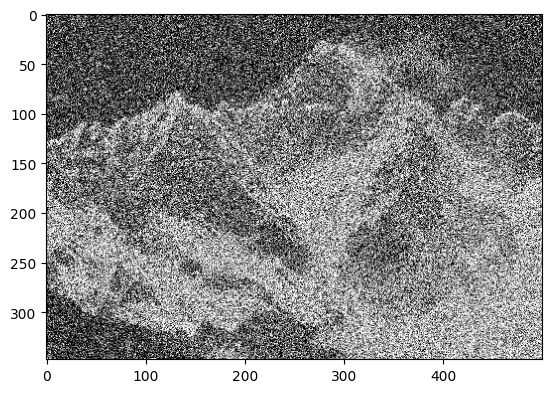

In [ ]:
image_gray = io.imread("https://media.cheggcdn.com/media/22b/22b50981-307e-45c3-9cbc-a2510d71e99a/phpG6jQSX.png", as_gray=True) / 255
image_gauss = add_noise_to_image(image_gray, noise_type="gaussian", var=0.1)
plt.imshow(image_gauss, cmap="gray")

**Discussion Questions (Exercise 1c):**

1.  For Gaussian noise, which filter(s) seem most effective at reducing the noise? How much detail is lost with each filter?
2.  For Salt & Pepper noise, which filter is clearly superior? Explain why this filter is well-suited for this type of impulse noise.
3.  Compare the results of `cv2.blur` and `cv2.GaussianBlur`. What are the subtle differences in how they smooth the image?
4.  What happens if you significantly increase the kernel size (e.g., to `(11, 11)` and `11`) for each filter? How does it affect noise reduction and image blur? (Optional: Modify the code and re-run).


## Exercise 2: Sharpening an Image
**Objective:** Enhance the edges and details in the original grayscale image using a sharpening kernel applied with `cv2.filter2D`.

**Background:** Image sharpening aims to accentuate intensity changes, typically at edges. One common method is **unsharp masking**, which involves subtracting a blurred version of the image from the original to create a detail map, and then adding this map (or a scaled version of it) back to the original image. This can also be achieved directly using a convolution kernel. A typical 3x3 sharpening kernel is:

$K_{sharpen} = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$

This kernel effectively calculates `5 * original_pixel - sum(neighboring_pixels)`.

**Instructions:**

1.  Blur a copy of the image using the built in cv2.GaussianBlur function
2.  Add the difference between the blurred and original image to the original image i.e. (image_gray + (image_gray - image_blurred))
3.  Define a 3x3 sharpening kernel shown above as a NumPy array.
4.  Apply this kernel to the **original grayscale image** (`img_gray`) using `cv2.filter2D`.
    * Use the `ddepth` argument set to `-1` to ensure the output image has the same depth (data type) as the input image (`uint8`).
5.  Display the original grayscale image and the sharpened images side-by-side using the provided `show_images` function.
6.  Answer the discussion questions below.

**Discussion Questions:**

1.  Describe the visual effect of the sharpening filter. Which parts of the image are most affected?
2.  If the original image contained noise, what would happen to the noise after applying the sharpening filter? Why?
3.  How could you control the *amount* of sharpening? (Hint: Think about modifying the kernel, perhaps the center value, while keeping the sum of elements equal to 1 for brightness preservation, or by blending the sharpened image with the original). Experiment if desired.



--- Sharpening the Image ---


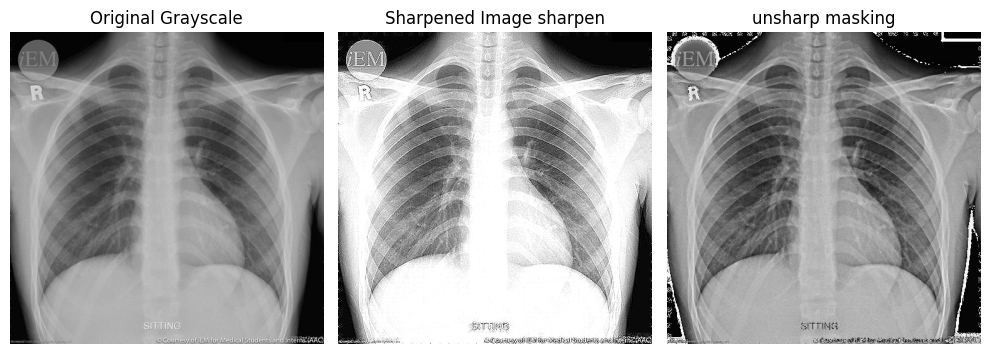

In [ ]:
img_gray = cv2.cvtColor(io.imread("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcharteredphysiotherapy.com%2Fwp-content%2Fuploads%2F2021%2F05%2Fxrays.jpg&f=1&nofb=1&ipt=cb82cb7f142d9a3c1809cb0f8636ff2d7b4fe19b4e8cc8d18e980bb544dc3b41"), cv2.COLOR_RGB2GRAY)
print("\n--- Sharpening the Image ---")

# 1. Define the sharpening kernel
# YOUR CODE HERE
sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32) * sharpen_kernel ** 2# Use float for kernel


# 2. Apply the kernel using cv2.filter2D
# ddepth=-1 ensures output has same depth as input (img_gray, which is uint8)
# YOUR CODE HERE
# Make sure img_gray exists from the image loading cell
if 'img_gray' not in locals():
    print("Error: img_gray not defined. Please run the image loading cell.")
else:

    sharpened_img = cv2.filter2D(img_gray, -1, sharpen_kernel, )
    sharpened_image_blur = img_gray + (img_gray - cv2.GaussianBlur(img_gray, (15,15), 10))
    # 3. Display the results
    show_images(
        [img_gray.copy(), sharpened_img, sharpened_image_blur], # Use copy of img_gray if show_images modifies it
        ["Original Grayscale", "Sharpened Image sharpen", "unsharp masking"],
        rows=1,cols=3,
        figsize=(10, 5)
    )


### Exercise 3: Edge Detection using First and Second Order Derivatives

**Objective:** Detect edges in the grayscale image using operators that approximate image derivatives: Sobel (first-order) and Laplacian (second-order).

**Background:**

* **Sobel Operator:** Computes the image gradient in the X and Y directions ($G_x, G_y$), highlighting vertical and horizontal edges, respectively. The magnitude of the gradient ($\sqrt{G_x^2 + G_y^2}$ or $|G_x| + |G_y|$) indicates edge strength.
* **Laplacian Operator:** Computes the second derivative ($\nabla^2 f$). It highlights regions of rapid intensity change and is often used for edge detection by finding its zero-crossings. Displaying the absolute Laplacian value also shows areas of high change. It is generally more sensitive to noise than Sobel.

**Instructions:**

1.  Apply the Sobel operator to the **original grayscale image** (`img_gray`):
    * Calculate the X-gradient ($G_x$) using `cv2.Sobel` with `dx=1, dy=0`. Use `ddepth=cv2.CV_64F` to allow for negative values and prevent overflow, then take the absolute value and convert back to `uint8` using `cv2.convertScaleAbs`. Use a kernel size (`ksize`) of 3 or 5.
    * Calculate the Y-gradient ($G_y$) similarly, using `dx=0, dy=1`.
    * Combine the absolute X and Y gradients to estimate the gradient magnitude. A simple way is `cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)`.
2.  Apply the Laplacian operator to the **original grayscale image** (`img_gray`):
    * Use `cv2.Laplacian`. Again, use `ddepth=cv2.CV_64F` followed by `cv2.convertScaleAbs` for visualization. Use the same `ksize` as for Sobel.
3.  Use `show_images` to display:
    * Original Grayscale Image
    * Absolute Sobel X Gradient (`|G_x|`)
    * Absolute Sobel Y Gradient (`|G_y|`)
    * Combined Sobel Magnitude (approx.)
    * Absolute Laplacian Result (`|\nabla^2 f|`)
4.  Answer the discussion questions below.

**Discussion Questions:**

1.  What types of edges (horizontal, vertical, diagonal) are highlighted most strongly by the Sobel X gradient? By the Sobel Y gradient?
2.  How does the combined Sobel image represent the overall edge information compared to the individual X and Y components?
3.  Compare the combined Sobel result with the Laplacian result. Which operator produces finer lines? Which seems more sensitive to noise or texture?
4.  Why is it important to use `cv2.CV_64F` as an intermediate depth when calculating derivatives before converting back to `uint8`? What might happen if you calculated directly to `uint8`?



--- Edge Detection using Derivatives ---


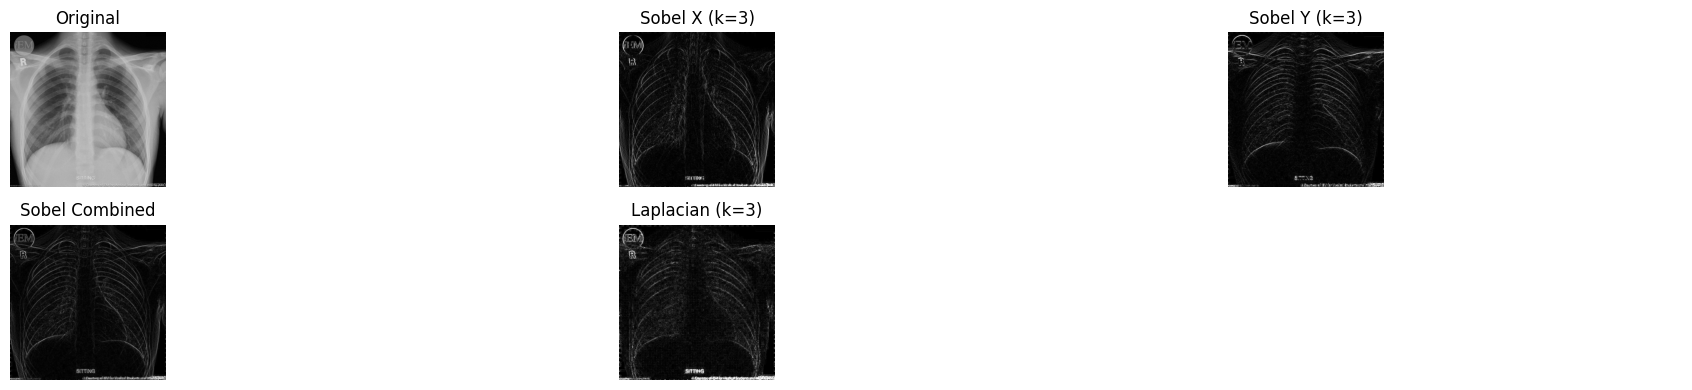

In [ ]:
# --- Exercise 3 Code ---
img_gray = cv2.cvtColor(io.imread("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcharteredphysiotherapy.com%2Fwp-content%2Fuploads%2F2021%2F05%2Fxrays.jpg&f=1&nofb=1&ipt=cb82cb7f142d9a3c1809cb0f8636ff2d7b4fe19b4e8cc8d18e980bb544dc3b41"), cv2.COLOR_RGB2GRAY)
print("\n--- Edge Detection using Derivatives ---")

# Define kernel size for operators
op_ksize = 3

# Make sure img_gray exists from the image loading cell
if 'img_gray' not in locals():
    print("Error: img_gray not defined. Please run the image loading cell.")
else:
    # 1. Apply Sobel Operator
    # X Gradient
    # YOUR CODE HERE: Calculate Sobel X (use CV_64F then convertScaleAbs)
    sobelx_64f = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=op_ksize)
    abs_sobel_x = cv2.convertScaleAbs(sobelx_64f)

    # Y Gradient
    # YOUR CODE HERE: Calculate Sobel Y (use CV_64F then convertScaleAbs)
    sobely_64f = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=op_ksize)
    abs_sobel_y = cv2.convertScaleAbs(sobely_64f)

    # Combine X and Y gradients (approximate magnitude)
    # YOUR CODE HERE: Use cv2.addWeighted or simple addition
    sobel_combined = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)


    # 2. Apply Laplacian Operator
    # YOUR CODE HERE: Calculate Laplacian (use CV_64F then convertScaleAbs)
    laplacian_64f = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=op_ksize)
    abs_laplacian = cv2.convertScaleAbs(laplacian_64f)


    # 3. Display results
    show_images(
        [img_gray.copy(), abs_sobel_x, abs_sobel_y, sobel_combined, abs_laplacian], # Use copy of img_gray
        ["Original", f"Sobel X (k={op_ksize})", f"Sobel Y (k={op_ksize})",
         "Sobel Combined", f"Laplacian (k={op_ksize})"],
        rows=2,
        cols=3,
        figsize=(20, 4)
    )


### Exercise 4: Canny Edge Detection

**Objective:** Implement the Canny edge detection algorithm, known for its effectiveness in producing thin, connected edges, using OpenCV's `cv2.Canny` function.

**Background:** The Canny algorithm is a multi-step process:

1.  **Noise Reduction:** Apply Gaussian blur to smooth the image.
2.  **Gradient Calculation:** Find intensity gradients (similar to Sobel).
3.  **Non-Maximum Suppression:** Thin the edges to single-pixel width by keeping only local maxima in the gradient direction.
4.  **Hysteresis Thresholding:** Use two thresholds, `minVal` (low) and `maxVal` (high). Edges with intensity gradient above `maxVal` are marked as strong edges. Edges between `minVal` and `maxVal` are marked as weak edges only if they are connected to strong edges. Edges below `minVal` are discarded. This helps connect edge segments.

**Instructions:**

1.  Apply the `cv2.Canny` function to the **original grayscale image** (`img_gray`).
2.  You need to provide two threshold values: `threshold1` (minVal) and `threshold2` (maxVal).
3.  Experiment with at least two different pairs of thresholds:
    * Pair 1: A common starting point (e.g., `threshold1=100`, `threshold2=200`).
    * Pair 2: A different set, perhaps with lower values or a wider/narrower gap (e.g., `threshold1=50`, `threshold2=150`).
    * Note: `threshold2` must always be greater than or equal to `threshold1`.
4.  Display the original grayscale image and the Canny edge maps obtained with each threshold pair using `show_images`.
5.  Answer the discussion questions below.

**Discussion questions**
1.  How does changing the `threshold1` (low threshold) affect the Canny edge map? What about `threshold2` (high threshold)?
2.  What happens if the gap between `threshold1` and `threshold2` is very small? What if it's very large?
3.  Compare the Canny edge results to the Sobel and Laplacian results from Exercise 3. What are the main advantages of Canny (e.g., in terms of edge thickness, continuity, noise)?
4.  The `cv2.Canny` function applies Gaussian smoothing internally. If your input image `img_gray` was already quite blurry, how might that affect the Canny result compared to applying it on a sharp image?




--- Canny Edge Detection ---


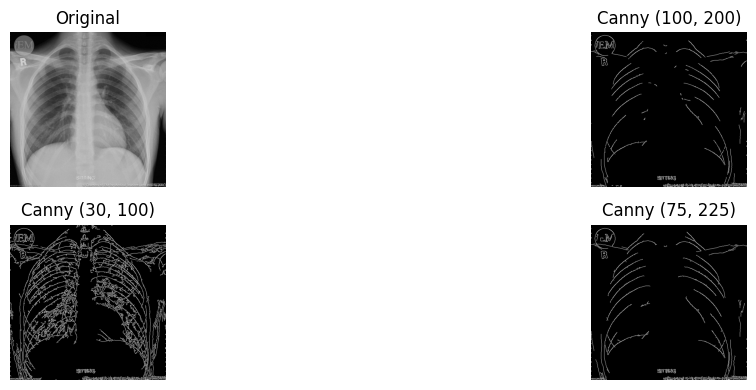

In [ ]:
# --- Exercise 4 Code ---

print("\n--- Canny Edge Detection ---")

# Make sure img_gray exists from the image loading cell
if 'img_gray' not in locals():
    print("Error: img_gray not defined. Please run the image loading cell.")
else:
    # 1. & 2. Apply Canny edge detection

    # 3. Experiment with different threshold pairs
    # Pair 1: Standard thresholds
    thresh1_pair1 = 100
    thresh2_pair1 = 200
    # YOUR CODE HERE: Apply Canny with Pair 1 thresholds
    canny_edges_1 = cv2.Canny(img_gray, thresh1_pair1, thresh2_pair1)


    # Pair 2: Lower thresholds / different gap
    thresh1_pair2 = 30
    thresh2_pair2 = 100
    # YOUR CODE HERE: Apply Canny with Pair 2 thresholds
    canny_edges_2 = cv2.Canny(img_gray, thresh1_pair2, thresh2_pair2)

    # Optional: Pair 3
    thresh1_pair3 = 75
    thresh2_pair3 = 225
    # YOUR CODE HERE: Apply Canny with Pair 3 thresholds
    canny_edges_3 = cv2.Canny(img_gray, thresh1_pair3, thresh2_pair3)


    # 4. Display results
    show_images(
        [img_gray.copy(), canny_edges_1, canny_edges_2, canny_edges_3], # Use copy of img_gray
        ["Original", f"Canny ({thresh1_pair1}, {thresh2_pair1})",
         f"Canny ({thresh1_pair2}, {thresh2_pair2})", f"Canny ({thresh1_pair3}, {thresh2_pair3})"],
         rows=2,
        cols=2,
        figsize=(16, 4)
    )

### Exercise 5: Corner Detection (Harris)

**Objective:** Detect corners in the grayscale image using the Harris Corner Detection algorithm (`cv2.cornerHarris`).

**Background:** Corners are points where intensity changes significantly in multiple directions. The Harris detector calculates a corner response score for each pixel based on the local image gradients. A high score indicates a high likelihood of being a corner.

Key parameters for `cv2.cornerHarris`:
* `src`: Input grayscale image (must be float32).
* `blockSize`: Size of the neighborhood considered for corner detection.
* `ksize`: Aperture parameter for the Sobel operator used internally (must be odd).
* `k`: Harris detector free parameter (typically between 0.04 and 0.06).

The output is a grayscale image (response map) where brighter pixels indicate higher corner scores. We need to threshold this map to identify the actual corners.

**Instructions:**

1.  Ensure the input grayscale image (`img_gray`) is of type `float32`.
2.  Apply the Harris Corner Detector (`cv2.cornerHarris`) to the `float32` grayscale image. Choose appropriate parameters (e.g., `blockSize=2`, `ksize=3`, `k=0.04`).
3.  The result is a corner response map (`dst`). Threshold this map to identify strong corners. A common technique is to consider pixels where `dst > threshold * dst.max()`. Experiment with the `threshold` value (e.g., start with `0.01`).
4.  (Optional but recommended for visualization) Dilate the thresholded result slightly using `cv2.dilate`. This makes the detected points larger and easier to see.
5.  Create a copy of the **original color image** (`img_bgr`) to draw on.
6.  Mark the detected corners (where the thresholded/dilated map is non-zero) on the color copy, for example, by drawing small red circles.
7.  Display the original color image and the image with detected corners side-by-side using `show_images`.
8.  Answer the discussion questions below.

**Discussion Questions:**

1.  How does changing the `k` parameter in `cv2.cornerHarris` affect the detected corners? Try values like 0.01 and 0.1.
2.  How does changing the `threshold_ratio` used for identifying strong corners affect the result? What happens if it's too low or too high?
3.  What kind of features in the image are typically detected as corners by the Harris detector? Are straight edges detected?
4.  Compare the locations marked as corners with the edge maps produced by Sobel or Canny (Exercises 3 & 4). What's the fundamental difference between an edge detector and a corner detector?
5.  (Optional Research) Look up the Shi-Tomasi corner detector (`cv2.goodFeaturesToTrack`). How does its criterion for selecting corners differ from Harris?



--- Corner Detection (Harris) ---


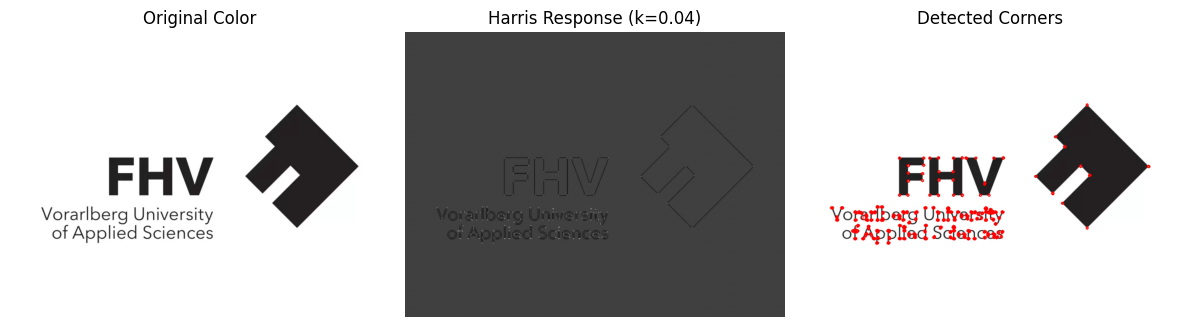

In [ ]:
# --- Exercise 5 Code ---

print("\n--- Corner Detection (Harris) ---")
img_rgb = io.imread("https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmediaresource.sfo2.digitaloceanspaces.com%2Fwp-content%2Fuploads%2F2024%2F04%2F22093908%2Ffhv-fachhochschule-vorarlberg-university3172.logowik.com.webp&f=1&nofb=1&ipt=5df8e4a8c936483f9b035a839037dc011f2b9528f7fe2b8ff715189c469047a4")
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# Make sure img_gray and img_bgr exist from the image loading cell
if 'img_gray' not in locals() or 'img_bgr' not in locals():
    print("Error: img_gray or img_bgr not defined. Please run the image loading cell.")
else:
    # 1. Convert grayscale image to float32
    gray_float32 = np.float32(img_gray)

    # 2. Apply Harris Corner Detector
    blockSize = 2  # Neighborhood size
    ksize = 3      # Sobel kernel size
    k = 0.04       # Harris detector free parameter
    # YOUR CODE HERE: Apply cv2.cornerHarris
    dst = cv2.cornerHarris(gray_float32, blockSize, ksize, k)

    # 3. Threshold the result to get strong corners
    # We mark corners where the response is greater than a percentage of the max response
    threshold_ratio = 0.01
    # YOUR CODE HERE: Create a thresholded map (corners_thresholded)
    # Hint: corners_thresholded = dst > threshold_ratio * dst.max()
    corners_thresholded = dst > threshold_ratio * dst.max()

    # 4. Optional: Dilate the result to make corners larger
    # Create a structuring element (e.g., a 3x3 square)
    kernel = np.ones((3,3), np.uint8)
    corners_dilated = cv2.dilate(corners_thresholded.astype(np.uint8), kernel) # Dilation works on uint8

    # 5. Create a copy of the color image to draw on
    img_corners = img_bgr.copy()

    # 6. Mark detected corners on the color image
    # Find coordinates where corners_dilated is non-zero (True)
    # Draw red circles at these locations
    # Note: Harris output `dst` has same dimensions as input, so coordinates match
    corner_coords = np.argwhere(corners_thresholded) # Get (row, col) tuples

    for coord in corner_coords:
        row, col = coord
        # Draw a circle: cv2.circle(image, center_coordinates, radius, color, thickness)
        # Remember coordinates are (col, row) for cv2 drawing functions
        cv2.circle(img_corners, (col, row), 3, (0, 0, 255), 1) # Red circle (BGR)

    # 7. Display the results
    show_images(
        [img_bgr.copy(), dst, img_corners], # Show original, response map, and marked corners
        ["Original Color", f"Harris Response (k={k})", "Detected Corners"],
        rows=1,
        cols=3,
        figsize=(12, 6)
    )



In [ ]:
# --- Exercise 3 Code ---
img_gray = io.imread("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcharteredphysiotherapy.com%2Fwp-content%2Fuploads%2F2021%2F05%2Fxrays.jpg", as_gray=True)


### Optional Exercise 1: Manual Canny Edge Detection Steps

**Objective:** Understand the Canny edge detection process by manually implementing its initial stages: Gaussian blurring and gradient calculation.

**Background:** The `cv2.Canny` function performs several steps internally. This exercise focuses on the first two and explains the others:

1.  **Noise Reduction:** Smooth the image using a Gaussian filter to reduce noise sensitivity. (`cv2.GaussianBlur`)
2.  **Gradient Calculation:** Compute the gradient magnitude and direction using the Sobel operator. (`cv2.Sobel`, `cv2.magnitude`/`np.hypot`, `cv2.phase`/`np.arctan2`)
3.  **Non-Maximum Suppression (NMS):** Thin the edges. For each pixel, check if its gradient magnitude is the largest compared to its two neighbors along the gradient direction. If not, suppress (set to zero) its magnitude. This requires quantizing the gradient angle (e.g., into 0, 45, 90, 135 degrees) and comparing along that direction. (Conceptually explained, not implemented here due to complexity).
4.  **Hysteresis Thresholding:** Apply two thresholds, `minVal` and `maxVal`. Pixels with gradient magnitude above `maxVal` are strong edge pixels. Pixels between `minVal` and `maxVal` are weak edge pixels. Strong edge pixels are kept. Weak edge pixels are kept only if they are connected to strong edge pixels (directly or via other connected weak pixels). (Conceptually explained, not implemented here due to complexity).

**Instructions:**

1.  Start with the original grayscale image (`img_gray`).
2.  **Step 1: Noise Reduction:** Apply Gaussian blur (`cv2.GaussianBlur`) with a suitable kernel size (e.g., 5x5) and sigma.
3.  **Step 2: Gradient Calculation:**
    * Apply the Sobel operator (`cv2.Sobel`) to the **blurred** image to find the X and Y gradients (use `ddepth=cv2.CV_64F`).
    * Calculate the gradient magnitude using `cv2.magnitude(sobel_x_64f, sobel_y_64f)` or `np.hypot(sobel_x_64f, sobel_y_64f)`. Convert the result to `uint8` for display (`cv2.convertScaleAbs` or manual scaling/clipping).
    * Calculate the gradient direction (angle) in radians using `cv2.phase(sobel_x_64f, sobel_y_64f, angleInDegrees=False)` or `np.arctan2(sobel_y_64f, sobel_x_64f)`. Normalize the angle map (e.g., to 0-255) for visualization if desired.
4.  Display the original grayscale image, the blurred image, the gradient magnitude map, and the gradient angle map using `show_images`.
5.  Conceptually think about how you would use the gradient magnitude and angle maps for Non-Maximum Suppression and Hysteresis Thresholding based on the descriptions above.
6.  Answer the discussion questions below.


--- Optional: Manual Canny Steps ---


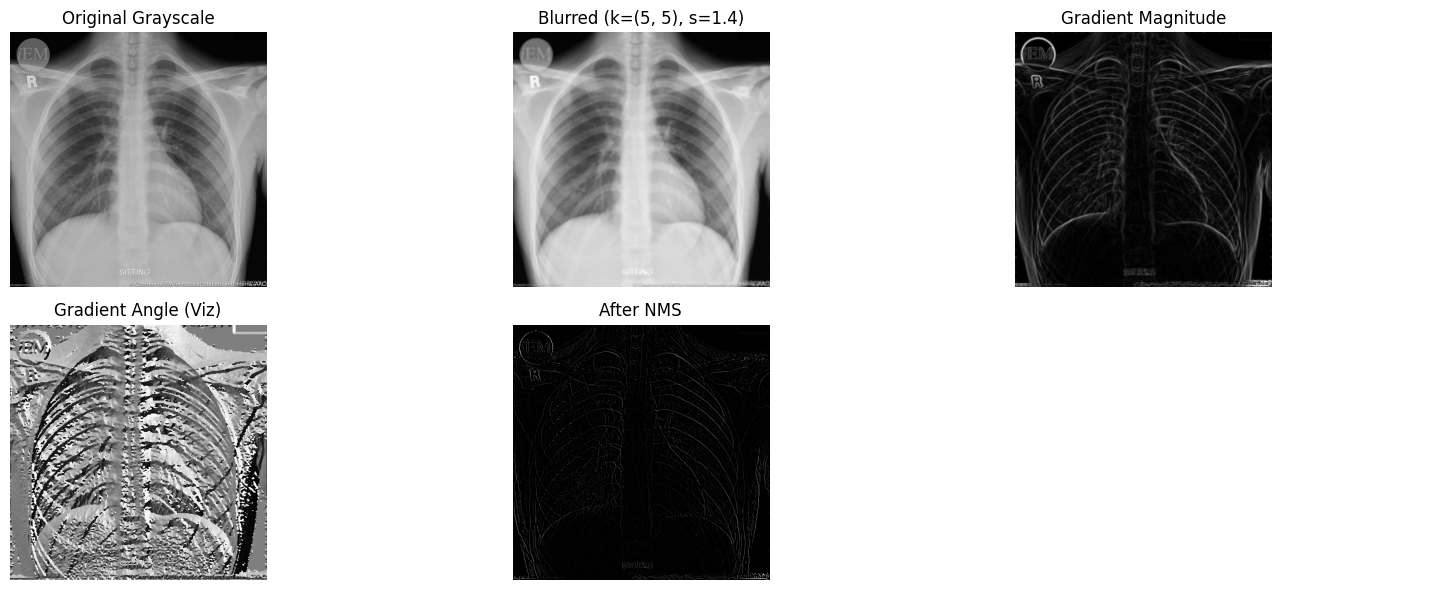

In [ ]:
# --- Optional Exercise 4b Code ---
img_gray = cv2.cvtColor(io.imread("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcharteredphysiotherapy.com%2Fwp-content%2Fuploads%2F2021%2F05%2Fxrays.jpg&f=1&nofb=1&ipt=cb82cb7f142d9a3c1809cb0f8636ff2d7b4fe19b4e8cc8d18e980bb544dc3b41"), cv2.COLOR_RGB2GRAY)
print("\n--- Optional: Manual Canny Steps ---")

def non_maximum_suppression(image, angles):
    size = image.shape
    suppressed = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                value_to_compare = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                value_to_compare = max(image[i - 1, j], image[i + 1, j])
            else:
                value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])

            if image[i, j] >= value_to_compare:
                suppressed[i, j] = image[i, j]
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    return suppressed

# Make sure img_gray exists from the image loading cell
if 'img_gray' not in locals():
    print("Error: img_gray not defined. Please run the image loading cell.")
else:
    # 1. Step 1: Noise Reduction (Gaussian Blur)
    blur_ksize = (5, 5)
    blur_sigma = 1.4 # Example sigma, can be 0 for auto-calculation based on ksize
    # YOUR CODE HERE: Apply GaussianBlur to img_gray
    img_blurred = cv2.GaussianBlur(img_gray, blur_ksize, blur_sigma)

    # 2. Step 2: Gradient Calculation (Sobel)
    sobel_ksize = 3 # Use ksize=3 for Sobel usually
    # YOUR CODE HERE: Calculate Sobel X gradient (use CV_64F) on img_blurred
    sobel_x_64f = cv2.Sobel(img_blurred, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
    # YOUR CODE HERE: Calculate Sobel Y gradient (use CV_64F) on img_blurred
    sobel_y_64f = cv2.Sobel(img_blurred, cv2.CV_64F, 0, 1, ksize=sobel_ksize)

    # Calculate Gradient Magnitude
    # YOUR CODE HERE: Use cv2.magnitude or np.hypot
    gradient_magnitude_64f = cv2.magnitude(sobel_x_64f, sobel_y_64f)
    # Convert magnitude to uint8 for display
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude_64f) # Simple conversion

    # Calculate Gradient Angle (Direction) in radians
    # YOUR CODE HERE: Use cv2.phase or np.arctan2
    # np.arctan2(Y, X) gives angle in radians (-pi to +pi)
    gradient_angle_rad = np.arctan2(sobel_y_64f, sobel_x_64f)

    # Optional: Normalize angle to 0-255 for visualization
    # Shift range from [-pi, pi] to [0, 2*pi], then scale to [0, 255]
    gradient_angle_viz = cv2.normalize(gradient_angle_rad, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


    # 3. Steps 3 & 4 (NMS and Hysteresis) are conceptually explained, not implemented here.
    # NMS would use gradient_magnitude_64f and gradient_angle_rad to thin edges.
    # Hysteresis would use the NMS result and two thresholds.
    suppressed = non_maximum_suppression(gradient_magnitude, gradient_angle_rad)

    # 4. Display intermediate results
    show_images(
        [img_gray.copy(), img_blurred, gradient_magnitude, gradient_angle_viz, suppressed],
        ["Original Grayscale", f"Blurred (k={blur_ksize}, s={blur_sigma})",
         "Gradient Magnitude", "Gradient Angle (Viz)", "After NMS"],
        figsize=(16, 6),
        rows=2, cols=3
    )


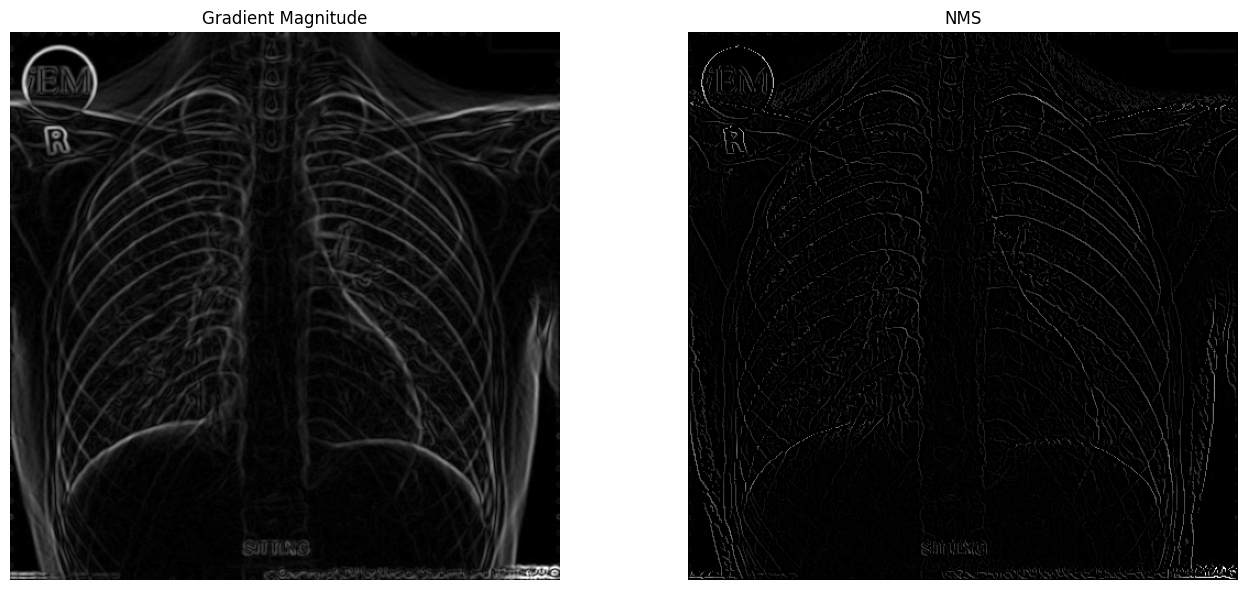

In [ ]:
show_images([gradient_magnitude, suppressed], ["Gradient Magnitude", "NMS"], figsize=(14, 6), rows=1, cols=2)

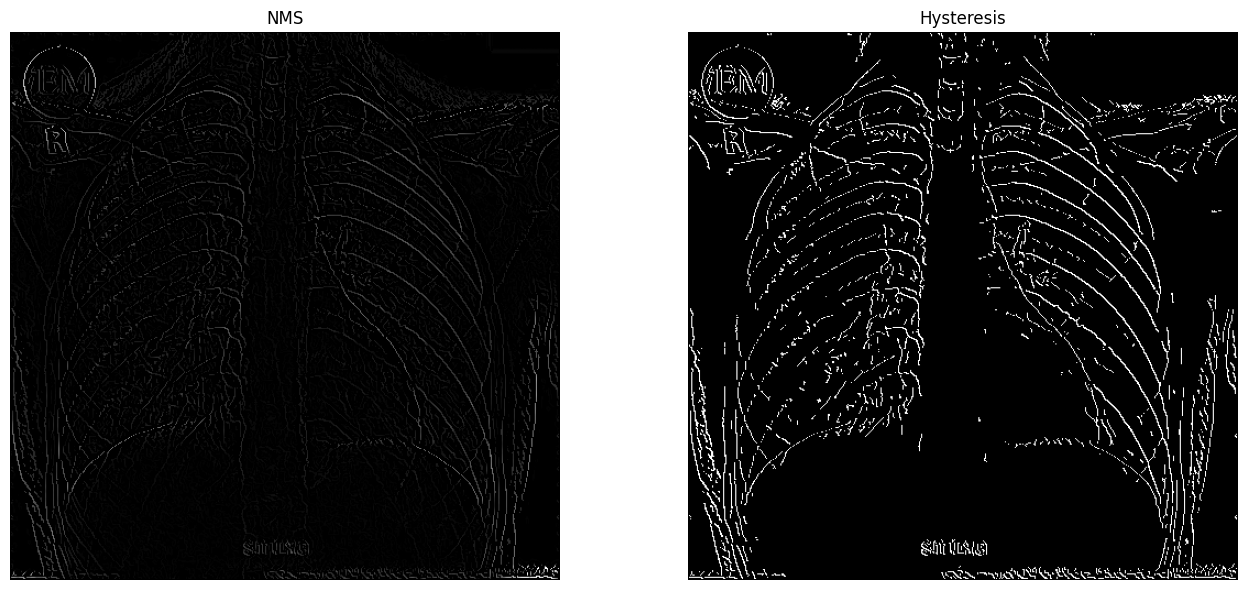

In [ ]:
def double_threshold_hysteresis(image, low, high):
    weak = 50
    strong = 255
    size = image.shape
    result = np.zeros(size)
    weak_x, weak_y = np.where((image > low) & (image <= high))
    strong_x, strong_y = np.where(image >= high)
    result[strong_x, strong_y] = strong
    result[weak_x, weak_y] = weak
    dx = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
    dy = np.array((0, 1, 1, 1, 0, -1, -1, -1))
    size = image.shape

    while len(strong_x):
        x = strong_x[0]
        y = strong_y[0]
        strong_x = np.delete(strong_x, 0)
        strong_y = np.delete(strong_y, 0)
        for direction in range(len(dx)):
            new_x = x + dx[direction]
            new_y = y + dy[direction]
            if((new_x >= 0 & new_x < size[0] & new_y >= 0 & new_y < size[1]) and (result[new_x, new_y]  == weak)):
                result[new_x, new_y] = strong
                np.append(strong_x, new_x)
                np.append(strong_y, new_y)
    result[result != strong] = 0
    return result
hysteresis = double_threshold_hysteresis(suppressed, 15, 35)
show_images([suppressed, hysteresis], ["NMS", "Hysteresis"], figsize=(14, 6), rows=1, cols=2)